# Modelling & Evaluation notebook

## Objectives

### Train a Machine Learning Model:
- Develop a model capable of classifying cherry leaves as healthy or containing powdery mildew based on the provided dataset.

### Evaluate Model Performance:
- Assess the model's effectiveness in distinguishing between healthy and mildew-labeled leaves using appropriate evaluation metrics.

## Inputs

### Preprocessed Image Dataset:
- The dataset containing preprocessed cherry leaf images, annotated with labels indicating whether the leaves are healthy or affected by powdery mildew.

### Training and Validation Sets:
- Split the dataset into training and validation sets for model training and evaluation.

## Outputs

### Trained Machine Learning Model:
- A trained model capable of classifying cherry leaves as healthy or containing powdery mildew.

### Model Evaluation Metrics:
- Metrics such as accuracy, precision, recall, and F1-score to quantify the model's performance.

### Visualization of Results:
- Visualizations (e.g., confusion matrix, ROC curve) to provide a clear understanding of the model's strengths and weaknesses.

### Documentation and Insights:
- Document insights gained from the modeling process, including challenges faced, hyperparameter choices, and potential improvements.

## Additional comments

---

---

## Import regular packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/notebooks')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/notebooks'

---

## Set input directory

Set train, validation and test paths

In [27]:
my_data_dir = '/workspace/Portfolio-project-5-Milldew-detection-in-Cherry-Leaves/datasets'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'


## Set output directory

In [28]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [29]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images in train, test and validation data

* train - healthy: 1472 images
* train - milldew: 1472 images
* validation - healthy: 210 images
* validation - milldew: 210 images
* test - healthy: 422 images
* test - milldew: 422 images




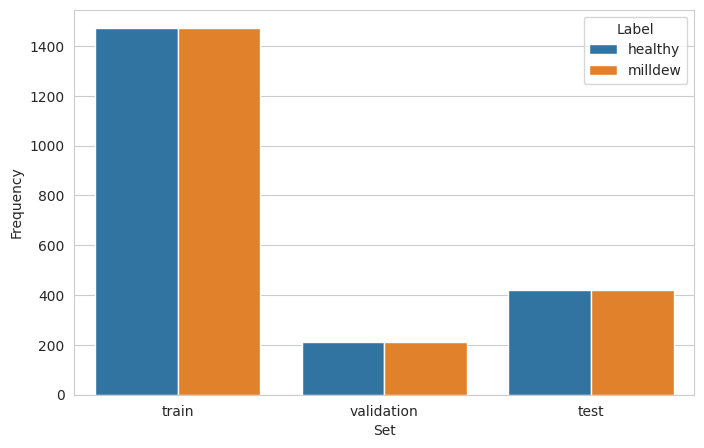

In [31]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image Augmentation

---

### Image data generator

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-20 12:34:26.723962: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-20 12:34:26.724012: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Initialize ImageDataGenerator

In [33]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Augment training image dataset

In [34]:
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

### Augment validation image dataset

In [35]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

### Augment test image dataset

In [36]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'milldew': 1}

## Plot augmented training image

(20, 256, 256, 3)


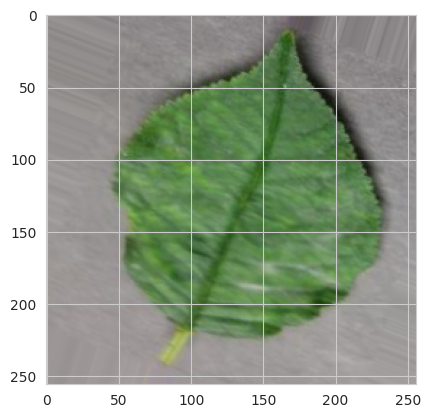

(20, 256, 256, 3)


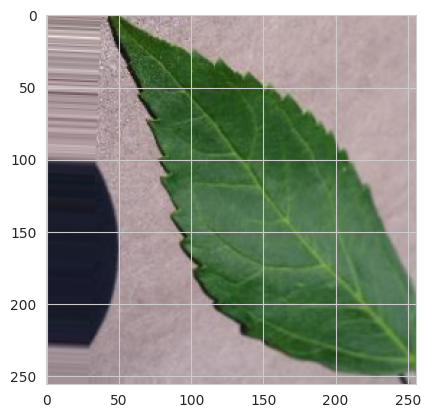

(20, 256, 256, 3)


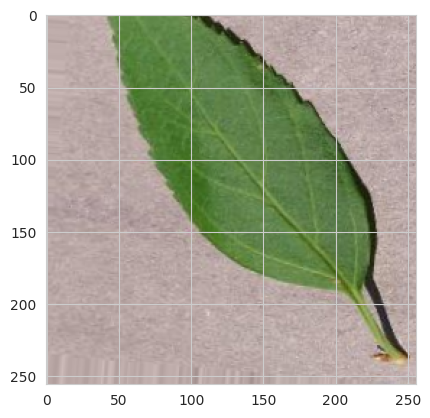

In [37]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


## Plot augmented validation and test images

(20, 256, 256, 3)


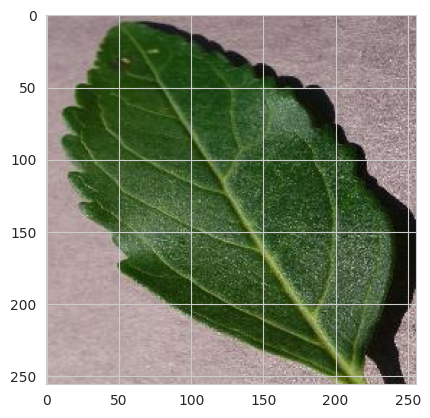

(20, 256, 256, 3)


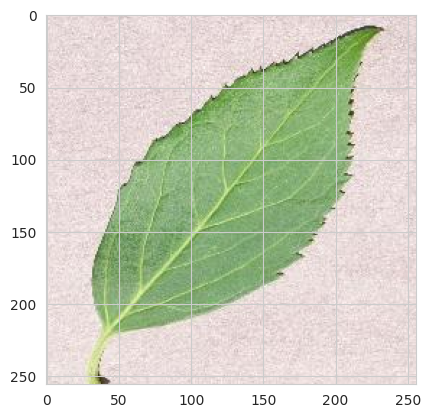

(20, 256, 256, 3)


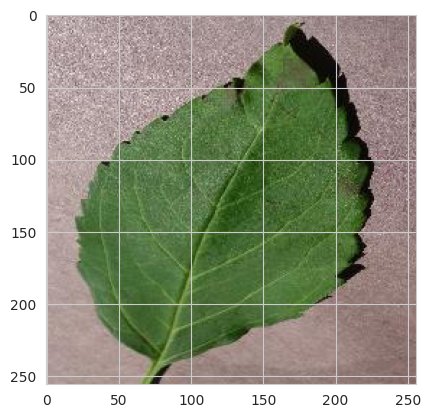

In [38]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()


(20, 256, 256, 3)


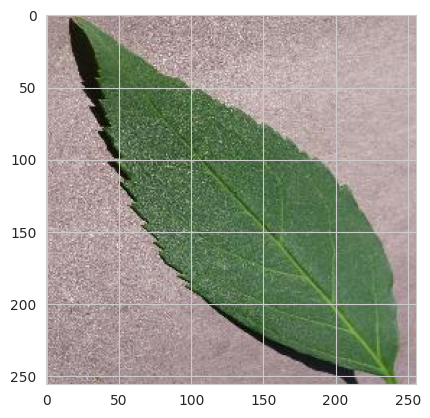

(20, 256, 256, 3)


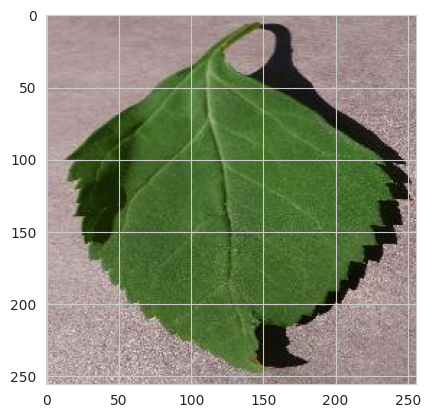

(20, 256, 256, 3)


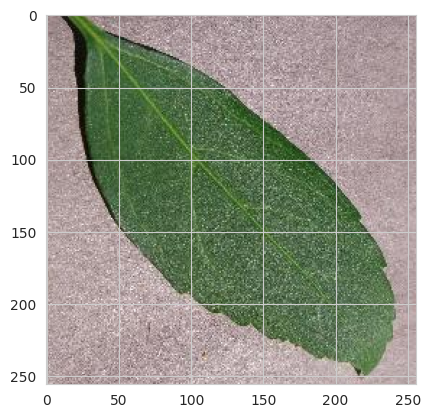

In [39]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

## Save class indices

In [40]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# Model Creation

---